In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('insurance.csv')

In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
data.shape

(1338, 7)

In [8]:
print("number of rows",data.shape[0])
print("number of  column",data.shape[1])

number of rows 1338
number of  column 7


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [21]:
data['smoker']=data['smoker'].map({'no':0,'yes':1})

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [23]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
data['region']=data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [27]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [53]:
X=data.drop(['charges'],axis=1)

In [54]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [55]:
y=data['charges']

In [56]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Train/Test split

1. Split data into two part : a training set and a testing set
2. train the model on training set
3. Test the model(s) on Testing set

In [57]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

## Import the models

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Model Training

In [67]:
lr=LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

## Prediction on Test data 

In [68]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rm.predict(X_test)
y_pred4 = gr.predict(X_test)

df1=pd.DataFrame({'Actual':y_test, 'Lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3,'gr':y_pred4 })

In [69]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10972.493653,11001.128629
887,5272.17580,7116.295018,9492.515425,5288.820871,5840.174656
890,29330.98315,36909.013521,9648.758701,28369.955769,28001.980112
1293,9301.89355,9507.874691,9555.044136,10647.016695,9745.291602
259,33750.29180,27013.350008,9420.421978,34584.817080,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47122.011815,45431.423211
575,12222.89830,11814.555568,9625.431547,12217.244930,12465.025294
535,6067.12675,7638.107736,9504.168517,6313.136276,6974.336525
543,63770.42801,40959.081722,9605.004594,46661.561816,47862.047791


## compare performance visually

In [70]:
import matplotlib.pyplot as plt

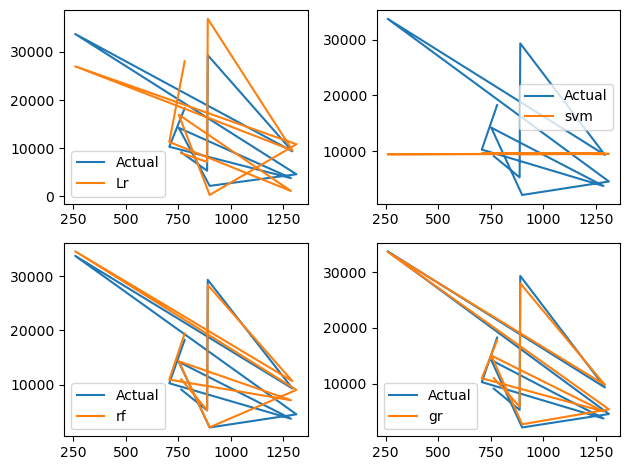

In [79]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()


plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')

plt.tight_layout()

plt.legend()


## Evaluating Algorithm

In [82]:
from sklearn import metrics

In [84]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [85]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07229762787861826 0.8622143122228245 0.8779936181637191


In [86]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [87]:
print(s1,s2,s3,s4)

4186.5088983664355 8592.428727899724 2490.592507630163 2447.167158715136


## Predict charges for new customer

In [88]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

df=pd.DataFrame(data,  index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [89]:
new_pred=gr.predict(df)
print(new_pred)

[44757.24853851]


## Save model using joblib

In [90]:
gr=GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [91]:
import joblib

In [92]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [93]:
model=joblib.load('model_joblib_gr')

In [94]:
model.predict(df)

array([42148.361888])

## GUI


In [95]:
from tkinter import * 

In [ ]:
import joblib

In [119]:
model = joblib.load('model_joblib_gr')


In [124]:
def predict_insurance_cost():
    try:
        age = float(entry_age.get())
        sex = int(entry_sex.get())
        bmi = float(entry_bmi.get())
        children = int(entry_children.get())
        smoker = int(entry_smoker.get())
        region = int(entry_region.get())

        # Create a DataFrame for the new customer
        data = {'age': age, 'sex': sex, 'bmi': bmi, 'children': children, 'smoker': smoker, 'region': region}
        df = pd.DataFrame(data, index=[0])

        # Make the prediction using the model
        prediction = model.predict(df)[0]

        # Display the prediction
        label_result.config(text=f"Predicted Insurance Cost: {prediction:.2f}")
    except Exception as e:
        label_result.config(text="Error: Invalid Input")

In [125]:
master = Tk()
master.title("Insurance Cost Prediction")

''

In [126]:
Label(master, text="Age:").grid(row=1, column=0)
entry_age = Entry(master)
entry_age.grid(row=1, column=1)

Label(master, text="Sex (0 for female, 1 for male):").grid(row=2, column=0)
entry_sex = Entry(master)
entry_sex.grid(row=2, column=1)

Label(master, text="BMI:").grid(row=3, column=0)
entry_bmi = Entry(master)
entry_bmi.grid(row=3, column=1)

Label(master, text="Number of Children:").grid(row=4, column=0)
entry_children = Entry(master)
entry_children.grid(row=4, column=1)

Label(master, text="Smoker (0 for no, 1 for yes):").grid(row=5, column=0)
entry_smoker = Entry(master)
entry_smoker.grid(row=5, column=1)

Label(master, text="Region (1 to 4):").grid(row=6, column=0)
entry_region = Entry(master)
entry_region.grid(row=6, column=1)

In [127]:
btn_predict = Button(master, text="Predict", command=predict_insurance_cost)
btn_predict.grid(row=7, columnspan=2)

In [ ]:
label_result = Label(master, text="", bg="black", fg="white")
label_result.grid(row=8, columnspan=2)

mainloop()